<a href="https://colab.research.google.com/github/sitinurmalasari-27/rekayasa-fitur/blob/main/UTS_Siti_Nurmalasari_14012200169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00


In [3]:
!pip install google-play-scraper

from google_play_scraper import reviews, Sort
import csv

result, _ = reviews(
    'com.icon.pln123',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=500,
    filter_score_with=None
)

filename = 'ulasan_google_play.csv'


with open(filename, 'w', newline='', encoding='utf-8') as f:
    writer = csv.DictWriter(f, fieldnames=['userName', 'score', 'at', 'content'])
    writer.writeheader()
    for review in result:

        writer.writerow({
            'userName': review['userName'],
            'score': review['score'],
            'at': review['at'],
            'content': review['content']
        })

print(f"Berhasil menyimpan {len(result)} ulasan ke '{filename}'")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
Berhasil menyimpan 500 ulasan ke 'ulasan_google_play.csv'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<bound method NDFrame.head of                   userName  score                   at  \
0              Ulcins2 Ulc      5  2025-12-11 03:29:02   
1               iman wisnu      4  2025-12-11 03:28:54   
2              ignan proga      5  2025-12-11 03:28:27   
3             Nita Puspita      5  2025-12-11 03:28:17   
4                 Hasirama      5  2025-12-11 03:28:13   
..                     ...    ...                  ...   
495             ILHAM RMXR      5  2025-12-11 00:13:10   
496          Mukti Benjeng      5  2025-12-11 00:13:06   
497  Kang Ais Putra Ragiel      5  2025-12-11 00:12:35   
498               Khumaidi      5  2025-12-11 00:12:32   
499                    Edo      5  2025-12-11 00:12:08   

                                               content  
0                                       trimakasih pLN  
1     sangat membantu, simpel beli token lwat aplikasi  
2    aplikasinya sangat membantu untuk proses pasan...  
3    Dengan adanya aplikasi PLN MOBILE semua 

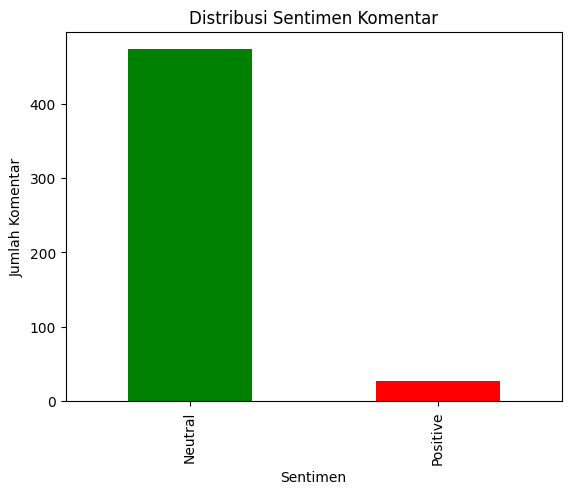

In [ ]:
!pip install pandas textblob matplotlib nltk

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

df = pd.read_csv("ulasan_google_play.csv")
print(df.head)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-z\s]", '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['clean_comment'] = df['content'].apply(clean_text)


def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_comment'].apply(sentiment)

print(df.head())
print(df['sentiment'].value_counts())

df['sentiment'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.title("Distribusi Sentimen Komentar")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Komentar")
plt.show()